In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
state='PA'
pa_excel = pd.read_excel(r"C:\Users\david\OneDrive\Documents\GitHub\SPEOC-pt-1\Data\Post1790\PA\PA_post1790_CD.xlsx",
                             header=11, usecols='J, K, L, M, Z, AA, AO, AP') 
pa_excel[['Cents', 'Cents.1', 'Cents.2']] = pa_excel[['Cents', 'Cents.1', 'Cents.2']].div(100)
pa_excel = pa_excel.loc[pa_excel['State'] == state]
pa_excel.drop('State', axis=1, inplace=True)
print(pa_excel)

     Occupation  Dollars  Cents  Dollars.1  Cents.1  Dollars.2  Cents.2
0      Merchant   3212.0   0.38     1606.0     0.19     1400.0     0.66
1           NaN   9601.0   0.24     4800.0     0.62     3079.0     0.84
2           NaN   1590.0   0.44      795.0     0.22      606.0      NaN
3           NaN   6406.0   0.88     3203.0     0.44     2376.0     0.33
4           NaN   2825.0   0.46     1412.0     0.73      839.0     0.70
...         ...      ...    ...        ...      ...        ...      ...
1274        NaN      6.0   0.85        3.0     0.42       21.0     0.13
1275    Esquire     20.0   0.25       10.0     0.13        NaN      NaN
1276        NaN      6.0   0.07        3.0     0.04        NaN      NaN
1277        NaN     48.0   0.23       24.0     0.12        NaN      NaN
1278        NaN     43.0   0.60       21.0     0.80        NaN      NaN

[917 rows x 7 columns]


In [20]:
def get_debt_no_job(occupations):
    no_occ = occupations[occupations['Occupation'].isna()] #query all people listed who have debt but no occupation listed
    no_occ_copy = no_occ.copy() #avoid settingcopywarning warning
    total = no_occ_copy[['Dollars', 'Dollars.1', 'Dollars.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns    

    return total.to_frame(name='totals') #convert to more usable dataframe format

def get_debt_w_job(occupations):
    occ = occupations[occupations['Occupation'].notna()] #query all people listed who have debt with an occupation listed
    occ_copy = occ.copy() #avoid settingcopywarning warning
    total = occ_copy[['Dollars', 'Dollars.1', 'Dollars.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns       
    
    return total.to_frame(name='totals.2') #convert to more usable dataframe format 

def plot(excel):
    no_occ = get_debt_no_job(excel)['totals'].reset_index(drop=True) #get dataframe for people with no occupation listed
    occ = get_debt_w_job(excel)['totals.2'].reset_index(drop=True) #get dataframe for people with an occupation listed
    
    NoOccExcel = pd.read_excel('NoOccupation.xlsx')
    OccExcel = pd.read_excel('Occupation.xlsx')
    
    ConcatDfNoOcc = pd.concat([NoOccExcel, no_occ], ignore_index=True, axis=1)
    ConcatDfOcc = pd.concat([OccExcel, occ], ignore_index=True, axis=1)
    
    ConcatDfNoOcc.to_excel('NoOccupation.xlsx', index=False)
    ConcatDfOcc.to_excel('Occupation.xlsx', index=False)
    
    plt.hist(no_occ, color='skyblue', edgecolor='black', range=[0,4000], bins=50, label='Occupation Not Listed', weights=np.ones_like(no_occ) / len(no_occ)) #plot
    plt.hist(occ, color='red', edgecolor='black', range=[0,4000], bins=50, alpha=0.5, label='Occupation Listed', weights=np.ones_like(occ) / len(occ)) #plot
    title = "Comparing Debt Holdings of Individuals with Occupation Listed vs Individuals with no Occupation Listed (" + state + ")"
    plt.title(title) #add title
    plt.xlabel("Total Debt Held By an Individual in Dollars") #add x title
    plt.ylabel("Frequency") #add y title
    plt.legend() #add legend

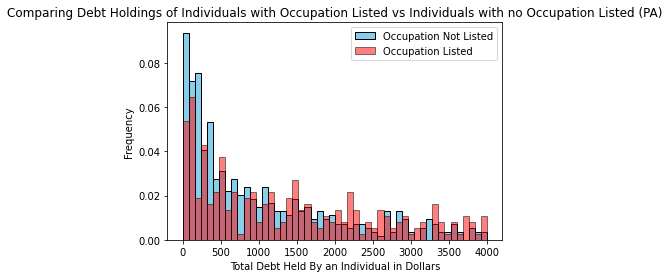

In [21]:
plot(pa_excel)